# Pymaceuticals Inc.
---

### Analysis

DATA/STUDY BACKGROUND:
- Total number of mice in study 248
- 51% male 49% female
- Capomulin and Ramicane regimens had >200 timepoints recorded
- Remaining regimens had <200 timepoints recorded
- An outlier in Infubinal regimen was found at 36.32.346 mm^3 with the closest datapoint being aproximately 45 mm^3

DATA ANALYSIS:
- After computing the linear regression and finding an r-value of 0.3458939706050919, the analysis of the Capomulin regimen finds a slight positive correlation between mouse weight and tumor volume
- Tumor volumes of ~45 mm^3 were found across mouse weights, but this value was the largest tumor volume for mice weighing under 24g while it was the smallest tumor volume for mice weighing 24g and over.
- After analyzing the results of a single mouse (b128) on the Capomulin regimen, the data shows a decrease in tumor volume of 7 mm^3 within 35 days

NEXT STEPS:
- Further analysis is needed to determine if the single mouse data translates to the entire population treated with Capomulin as well as a deeper dive into the data for the other regimins in the study to ensure a complete and indepth analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# view structure of data file
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [5]:
# view structure of data file
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [6]:
# Combine the data into a single DataFrame
study_data_merged_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice.
len(study_data_merged_df["Mouse ID"].unique())

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_merged_df.loc[study_data_merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_merged_df[study_data_merged_df["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = study_data_merged_df[study_data_merged_df["Mouse ID"].isin(duplicate_mouse_ids) == False]

clean_study_data.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [11]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data["Mouse ID"].unique())

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_deviation = clean_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

study_summary_df = pd.DataFrame(
    {
        "Mean Tumor Volume": mean,
        "Median Tumor Volume": median,
        "Variance Tumor Volume": variance,
        "Standard Deviation": standard_deviation,
        "SEM Tumor Volume": sem
    })
study_summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
study_summary_2 = clean_study_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
study_summary_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

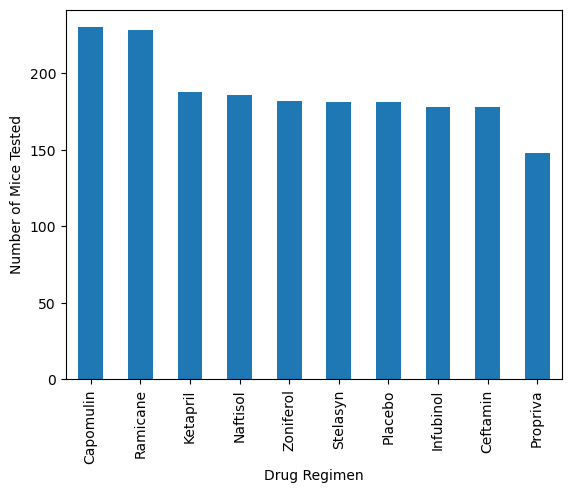

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_pandas = clean_study_data["Drug Regimen"].value_counts()
bar_pandas.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

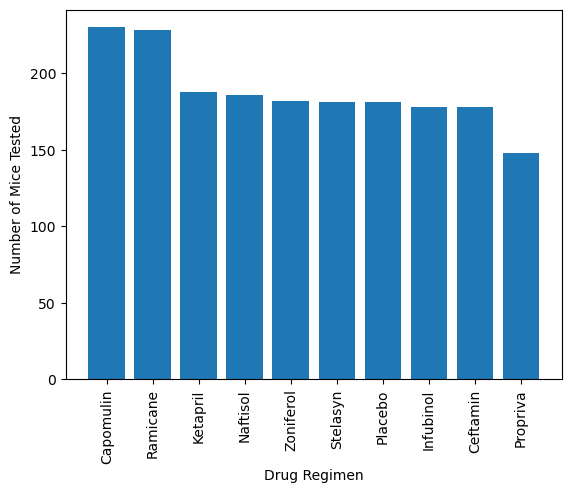

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_pyplot = clean_study_data["Drug Regimen"].value_counts()
plt.bar(bar_pyplot.index.values, bar_pyplot.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

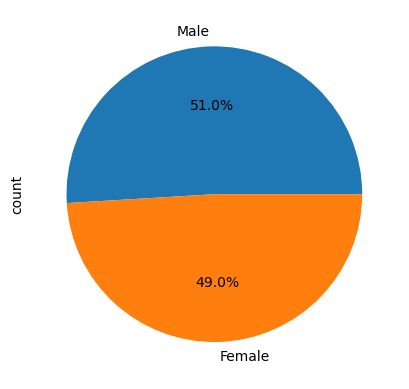

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_pandas = clean_study_data.Sex.value_counts()
pie_pandas.plot(kind="pie", autopct="%1.1f%%")
plt.show()

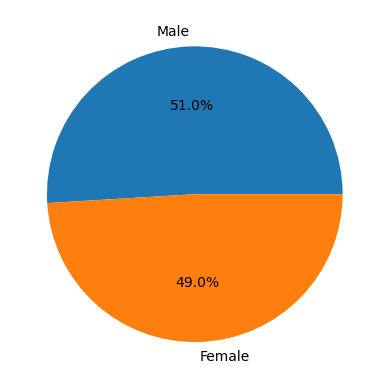

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_pyplot = clean_study_data.Sex.value_counts()
plt.pie(pie_pyplot.values, labels=pie_pyplot.index.values, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxtime = clean_study_data.groupby(["Mouse ID"])["Timepoint"].max()
maxtime = maxtime.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_maxtime = maxtime.merge(clean_study_data, on=["Mouse ID", "Timepoint"], how="left")
merged_maxtime



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tumor_vol = merged_maxtime.loc[merged_maxtime["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_list.append(drug_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = drug_tumor_vol.loc[(drug_tumor_vol < lower_bound) | (drug_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers{outliers}")

Capomulin's potential outliersSeries([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliersSeries([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliersSeries([], Name: Tumor Volume (mm3), dtype: float64)


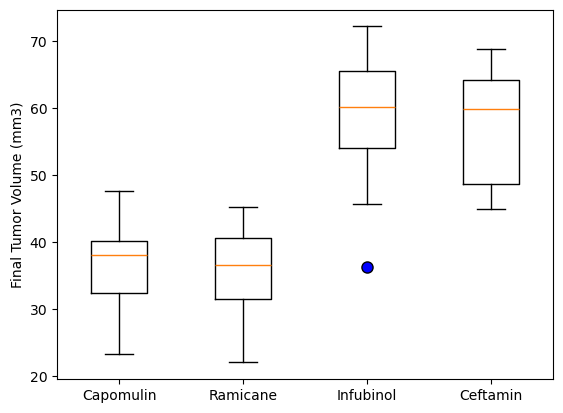

In [42]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment_box = dict(markerfacecolor="blue", markersize=8)
plt.boxplot(tumor_volume_list, labels = treatments, flierprops=treatment_box)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment: mouse b128')

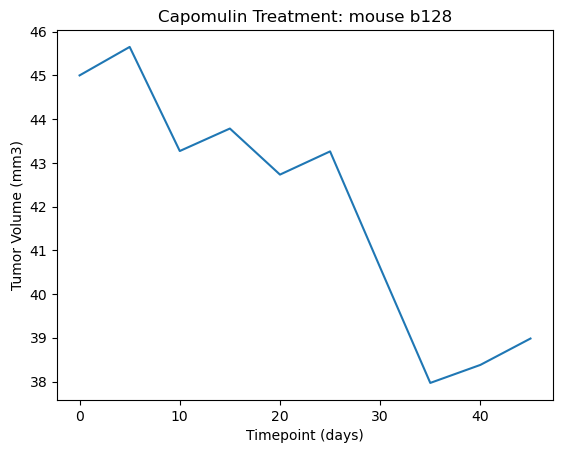

In [43]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data_line = clean_study_data[clean_study_data["Drug Regimen"] == "Capomulin"]
single_mouse = capomulin_data_line[capomulin_data_line["Mouse ID"] == 'b128']
plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment: mouse b128")

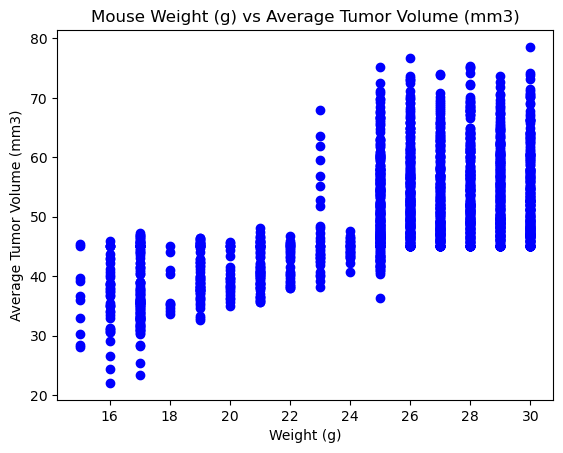

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_study_data_df = pd.DataFrame(clean_study_data)
#capomulin_study_data_df
x_values = capomulin_study_data_df["Weight (g)"]
y_values = capomulin_study_data_df["Tumor Volume (mm3)"]

plt.scatter(x_values, y_values, marker="o", color="blue")
plt.title("Mouse Weight (g) vs Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"

    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.xlabel("Tumor Volume (mm3)")
    plt.ylabel(title)
    plt.title("Mouse Weight (g) vs Tumor Volume (mm3)")
    print(f"The r-value is {rvalue ** 2}")
    plt.show()

The r-value is 0.3458939706050919


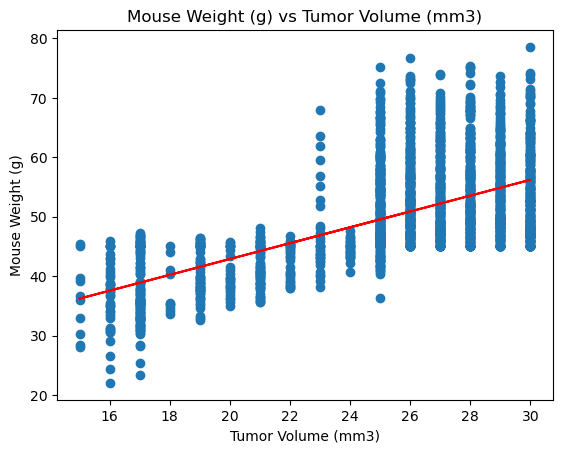

In [24]:
# set x & y values, plot
x_value = capomulin_study_data_df["Weight (g)"]
y_value = capomulin_study_data_df["Tumor Volume (mm3)"]
plot_linear_regression(x_value, y_value, "Mouse Weight (g)", (24, 25))
plt.show()